In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
import numpy as np
from random import seed
from random import randint
import math

In [2]:
#!pip install scipy==1.6
#import scipy
print(scipy.__version__)

1.6.0


In [3]:
df = pd.read_csv('HW4_data.csv')
print("There are", df.shape[0],"genes profiled")

There are 54675 genes profiled


In [4]:
#All the rows with null data
df[df.isnull().any(axis=1)].head()

,Class,H,H.1,H.2,H.3,H.4,H.5,H.6,H.7,H.8,...,M.39,M.40,M.41,M.42,M.43,M.44,M.45,M.46,M.47,M.48
46,1552307_a_at,9.541162,9.189833,9.814838,9.477109,9.406117,9.560735,9.504855,9.510239,8.631873,...,8.552314,9.023221,7.410703,8.364445,6.850354,5.676926,8.440599,8.104505,9.217905,8.398327
178,1552508_at,4.325815,3.892510,4.440345,4.309318,4.105673,3.968732,NaN,4.620053,4.411861,...,4.714707,4.297627,4.304446,4.103222,4.938146,4.322966,4.308142,4.884100,4.234336,4.968100
310,1552693_at,3.138115,2.782541,3.067586,3.082677,3.071420,3.137076,3.147077,2.723222,NaN,...,2.967587,2.643293,3.500799,2.953329,4.578667,5.148586,3.059414,3.940982,3.080051,3.028853
409,1552829_at,6.852085,7.531969,7.533730,8.889329,8.170707,8.637920,7.309301,6.948291,8.397220,...,9.210606,10.403012,7.487015,9.711685,6.657312,6.977372,8.092107,8.509918,10.307370,9.293913
541,1553020_at,4.438450,5.030185,5.181491,6.550262,5.191649,6.192403,5.503323,5.807958,4.693366,...,5.550402,4.736309,5.949094,5.178673,6.593627,6.085472,7.368396,5.203473,4.816480,5.603703


In [5]:
#Cleaning data- remove rows (genes) with missing values
df.dropna(axis='rows',inplace=True) 
columns_genes = df['Class'].copy()
#Remove first column with gene names
#df_new = df.copy()
#df_new = df_new.reindex(columns=sorted(df.columns))

#Reorder the samples so that the first 1-50 columns are H samples and 51-99 columns are M samples
#df.drop(columns = ['Class'], inplace = True)
df = df.reindex(columns=sorted(df.columns))
df = df.reset_index()
print(df.shape)

(54628, 101)


In [6]:
df.head()

,index,Class,H,H.1,H.10,H.11,H.12,H.13,H.14,H.15,...,M.44,M.45,M.46,M.47,M.48,M.5,M.6,M.7,M.8,M.9
0,0,1007_s_at,5.866378,4.948736,5.984605,6.444126,4.919960,6.837307,5.226223,6.137945,...,6.472517,5.678816,5.653286,6.013841,5.465334,5.249899,5.511501,4.949108,5.151583,5.126908
1,1,1053_at,8.225790,7.525865,7.552294,8.158129,7.799661,8.024728,6.805196,7.695904,...,8.261422,6.925753,7.918424,7.442701,9.225221,8.708723,8.087234,7.872137,8.146644,7.904487
2,2,117_at,6.179732,6.628137,5.899590,5.753603,5.880342,6.312273,6.733495,6.136814,...,6.367759,6.835756,7.577035,7.147417,6.481128,9.468659,7.496835,6.577698,7.188136,6.005948
3,3,121_at,6.179478,6.582889,6.390803,6.516453,5.791862,5.943976,6.003585,5.874296,...,6.440978,6.955883,6.499215,6.587065,6.897591,6.427513,6.191956,6.212989,6.498877,6.621110
4,4,1255_g_at,2.792048,2.695714,2.812740,3.037491,2.796160,2.767586,2.895934,2.884101,...,3.730139,2.914868,3.013901,2.729320,3.151449,2.679046,2.618108,2.755797,2.719151,2.587878


In [8]:
#save genes names
columns_genes = columns_genes.reindex()
columns_genes = columns_genes.reset_index()
columns_genes.drop(columns = ['index'], inplace = True)
print(columns_genes)

                 Class
0            1007_s_at
1              1053_at
2               117_at
3               121_at
4            1255_g_at
...                ...
54623   AFFX-ThrX-5_at
54624   AFFX-ThrX-M_at
54625  AFFX-TrpnX-3_at
54626  AFFX-TrpnX-5_at
54627  AFFX-TrpnX-M_at

[54628 rows x 1 columns]


In [7]:
df2 = df.iloc[0:,1:].copy()
df2.tail()

,Class,H,H.1,H.10,H.11,H.12,H.13,H.14,H.15,H.16,...,M.44,M.45,M.46,M.47,M.48,M.5,M.6,M.7,M.8,M.9
54623,AFFX-ThrX-5_at,3.139334,3.039961,3.569389,3.521989,3.265890,3.562010,3.485015,3.613486,3.448260,...,5.558780,3.416999,3.699181,3.485280,4.211922,3.455822,3.511451,3.032344,3.058083,3.092449
54624,AFFX-ThrX-M_at,2.747015,2.638606,2.660971,3.016550,2.660312,2.975747,3.009875,2.849478,3.022008,...,5.429437,2.834741,3.249683,2.711413,3.346835,2.722450,2.506801,2.495275,2.506128,2.799286
54625,AFFX-TrpnX-3_at,2.651554,2.643615,2.789709,2.822210,2.570557,2.718392,2.742103,3.047843,3.339235,...,4.487940,2.782356,3.056727,2.833818,3.069542,2.630015,2.586488,2.732129,2.546095,2.785586
54626,AFFX-TrpnX-5_at,3.413429,3.399063,3.535477,3.550628,3.505796,3.806258,3.479401,3.723033,3.613533,...,4.254286,3.882080,3.649827,3.523410,4.108475,3.506595,3.505293,3.476063,3.318993,3.402669
54627,AFFX-TrpnX-M_at,3.140612,3.132691,3.602383,3.833031,3.539491,3.966881,4.058410,4.214732,3.774068,...,5.375811,3.744138,4.021536,3.812564,4.592122,3.671304,4.114551,3.816572,3.268287,3.781758


In [11]:
# How many genes after cleaning missing data:
print("Number of genes to be used in the analysis", df2.shape[0])
# How many samples:
print("Number of samples to be used in analysis",df2.shape[1]-1)


Number of genes to be used in the analysis 54628
Number of samples to be used in analysis 99


In [12]:
#Split data into separate df for healthy and M where each df only contains samples and not gene names
H = df2.iloc[0:,1:51]
print(H.shape[1], "healthy samples")
M = df2.iloc[0:,51:]
print(M.shape[1], "Myocardial Infraction sampled patients")

50 healthy samples
49 Myocardial Infraction sampled patients


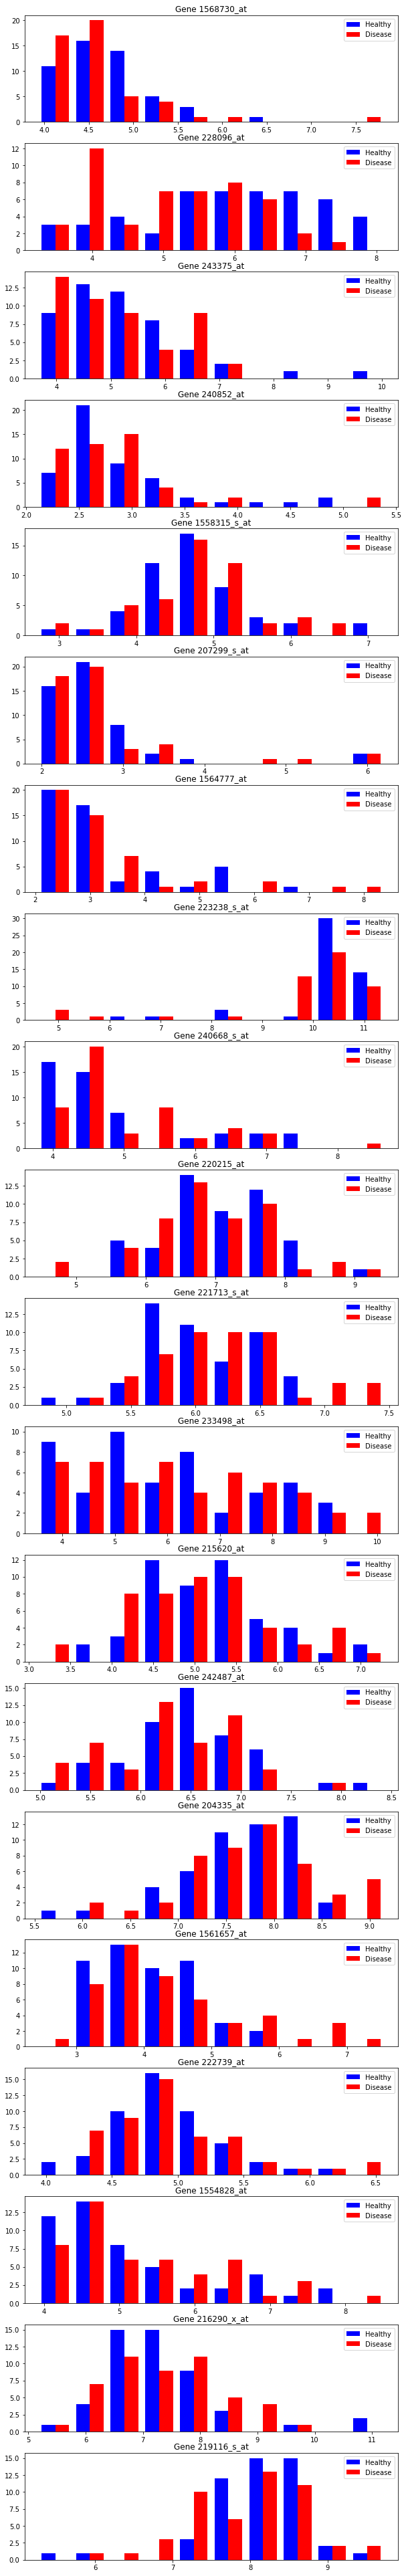

In [13]:
#pick 20 random genes and plot each in histogram in H vs M
seed(1)
fig, axes = plt.subplots(20,1, figsize = (10,70))

# generate random integer and plot
random_genes = []
for _ in range(20):
  value = randint(0, df2.shape[0])
  axes[_].hist([H.iloc[value], M.iloc[value]], color = ['b', 'r'], label = ('Healthy', 'Disease'))
  axes[_].set_title('Gene {}'.format(df2.iloc[value][0]))
  axes[_].legend(prop={'size': 10})


###Part B

B.1. 
The expected sum of ranks of M is:
$$ E[Rs] = \frac{B(n+1)}{2}$$ 
where B is the size of M
$$ E[Rs] = 2450 $$

B.2
The maximum value is when all the ranks of the M values are higher than the ranks of the H. It is:
$$ RS(g)_{max} = c = \sum_{k=51}^{99}{k} = 3675 $$

B.3
All permutations are equally probably under the null model and this possible sum of ranks is just 1 scenario out of all possible permutations each having uniform ditribution.
The probability of having the most extreme permutation is:
$$P(Rs(g)=c) = \frac{1}{99 \choose 49}$$


B.4
There is only one possible swap of H and M will give c-1, this is the ranks 50 and 51. Then, the probability of having rank c-1 is still the same as before.
$$P(Rs(g)= c-1) = \frac{1}{99 \choose 49}$$

B.5
Following the same reasoning than in previous questions, the only way of achieving $Rs(g)=c-2$ is by having 2.B.2 permutation and either swapping elements in ranks(49 with 51) or elements in ranks (50 with 52).
$$P(Rs(g) = c-2) = \frac{1}{99 \choose 49}+\frac{1}{99 \choose 49} = \frac{2}{99 \choose 49}$$

In [14]:
def calculate_rank_sum(H, M):
  Ha = H.copy()
  Ma = M.copy()
  #highest value get rank 1.

  rank_sum = 0 
  cnct = np.concatenate([Ma,Ha])
  rank = stats.rankdata(cnct)
  rank_sum = rank[:len(Ma)].sum()
  return rank_sum

In [15]:
#Part b.5
rank_sums = []
for i in range(0,len(df2.index)):
  rank_sum = calculate_rank_sum( H.iloc[i].astype("float").values, M.iloc[i].astype("float").values )
  rank_sums.append(rank_sum)

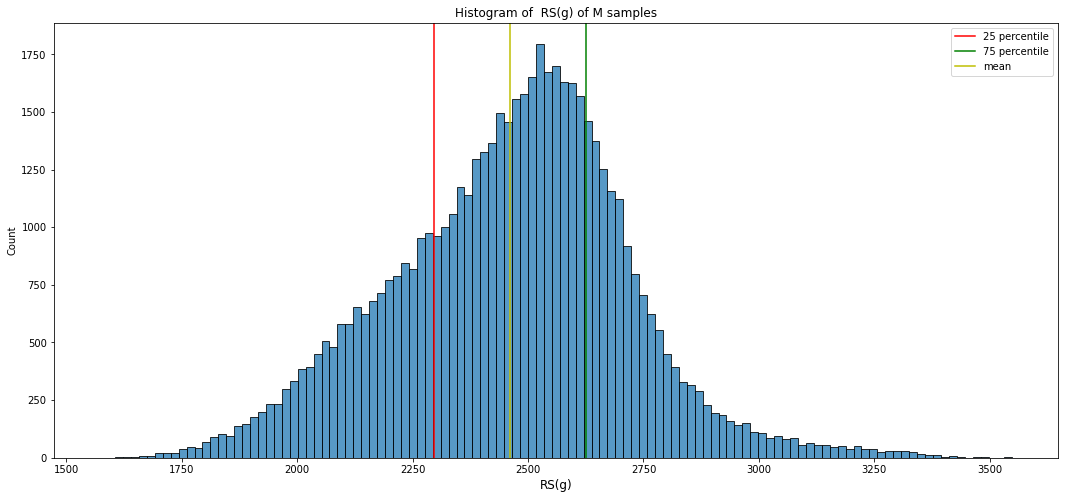

Mean 2461.560664860511
IQR: 329.0


In [16]:
perc_75 = np.percentile(rank_sums, 75)
perc_25 = np.percentile(rank_sums, 25)
fig, axes = plt.subplots(1,1, figsize=(18,8))
sns.histplot(rank_sums, ax=axes)
axes.set_title("Histogram of  RS(g) of M samples")
plt.axvline(perc_25, label='25 percentile', color="r")
plt.axvline(perc_75, label='75 percentile',color="g")
rank_mean = np.mean(rank_sums)
plt.axvline(rank_mean, label='mean',color="y")
axes.set_xlabel("RS(g)",fontsize=12)
plt.legend()
plt.show()

print("Mean", rank_mean )
print("IQR:", perc_75-perc_25)

###Part C - Differential expression

In [17]:
#Alternative hypothesis M is over expressed = H is underexpressed
p_values = np.empty(len(H))
df2['wrs_p_value'] = 0
for i in range(len(df2.index)):
  wrs_val, pval = stats.mannwhitneyu(H.iloc[i].astype("float").values, M.iloc[i].astype("float").values, use_continuity=True, alternative='less')
  p_values[i] = pval
  df2.iloc[i, df2.columns.get_loc("wrs_p_value")] = pval

In [18]:
df2.head()

,Class,H,H.1,H.10,H.11,H.12,H.13,H.14,H.15,H.16,...,M.45,M.46,M.47,M.48,M.5,M.6,M.7,M.8,M.9,wrs_p_value
0,1007_s_at,5.866378,4.948736,5.984605,6.444126,4.919960,6.837307,5.226223,6.137945,6.444286,...,5.678816,5.653286,6.013841,5.465334,5.249899,5.511501,4.949108,5.151583,5.126908,0.847386
1,1053_at,8.225790,7.525865,7.552294,8.158129,7.799661,8.024728,6.805196,7.695904,7.808028,...,6.925753,7.918424,7.442701,9.225221,8.708723,8.087234,7.872137,8.146644,7.904487,0.141349
2,117_at,6.179732,6.628137,5.899590,5.753603,5.880342,6.312273,6.733495,6.136814,7.929140,...,6.835756,7.577035,7.147417,6.481128,9.468659,7.496835,6.577698,7.188136,6.005948,0.000009
3,121_at,6.179478,6.582889,6.390803,6.516453,5.791862,5.943976,6.003585,5.874296,6.041638,...,6.955883,6.499215,6.587065,6.897591,6.427513,6.191956,6.212989,6.498877,6.621110,0.265536
4,1255_g_at,2.792048,2.695714,2.812740,3.037491,2.796160,2.767586,2.895934,2.884101,2.706394,...,2.914868,3.013901,2.729320,3.151449,2.679046,2.618108,2.755797,2.719151,2.587878,0.150969


In [ ]:
#Student T- test
#Need updated version of scipy to run one sided t-test

In [19]:
#Alternative hypothesis M is over expressed = H is underexpressed
p_values = np.empty(len(H))
df2['ttest_p_value'] = 0
for i in range(len(df2.index)):
  tval, pval = stats.ttest_ind(H.iloc[i].astype("float"),M.iloc[i].astype("float"), equal_var=False, alternative = 'less')
  p_values[i] = (pval)
  df2.iloc[i, df2.columns.get_loc("ttest_p_value")] = pval

In [21]:
alpha = 0.07
overexpressed_in_M = df2[df2['ttest_p_value'] <  alpha].shape[0]
underexpressed_in_M = df2[df2['ttest_p_value'] > (1-alpha)].shape[0]
w_overexpressed_in_M = df2[df2['wrs_p_value'] <  alpha].shape[0]
w_underexpressed_in_M = df2[df2['wrs_p_value'] > (1-alpha)].shape[0]

print(f'Underexpressed in M')
print(f'-based on WRS:{w_underexpressed_in_M} / based on T-test:{underexpressed_in_M}')
print(f'Overexpressed in M ')
print(f'-based on WRS:{w_overexpressed_in_M} / based on T-test:{overexpressed_in_M}')


Underexpressed in M
-based on WRS:10671 / based on T-test:8634
Overexpressed in M 
-based on WRS:10721 / based on T-test:8489


In [22]:
#df2['Genes'] = columns_genes
df2.head()

,Class,H,H.1,H.10,H.11,H.12,H.13,H.14,H.15,H.16,...,M.46,M.47,M.48,M.5,M.6,M.7,M.8,M.9,wrs_p_value,ttest_p_value
0,1007_s_at,5.866378,4.948736,5.984605,6.444126,4.919960,6.837307,5.226223,6.137945,6.444286,...,5.653286,6.013841,5.465334,5.249899,5.511501,4.949108,5.151583,5.126908,0.847386,0.898353
1,1053_at,8.225790,7.525865,7.552294,8.158129,7.799661,8.024728,6.805196,7.695904,7.808028,...,7.918424,7.442701,9.225221,8.708723,8.087234,7.872137,8.146644,7.904487,0.141349,0.328270
2,117_at,6.179732,6.628137,5.899590,5.753603,5.880342,6.312273,6.733495,6.136814,7.929140,...,7.577035,7.147417,6.481128,9.468659,7.496835,6.577698,7.188136,6.005948,0.000009,0.000061
3,121_at,6.179478,6.582889,6.390803,6.516453,5.791862,5.943976,6.003585,5.874296,6.041638,...,6.499215,6.587065,6.897591,6.427513,6.191956,6.212989,6.498877,6.621110,0.265536,0.459158
4,1255_g_at,2.792048,2.695714,2.812740,3.037491,2.796160,2.767586,2.895934,2.884101,2.706394,...,3.013901,2.729320,3.151449,2.679046,2.618108,2.755797,2.719151,2.587878,0.150969,0.315548


###Part D - Correlations

In [118]:
#Take 80 most overexpressed and underexpressed:
over_M = df2[['Class','wrs_p_value']].sort_values('wrs_p_value')['Class'][:80]
under_M = df2[['Class','wrs_p_value']].sort_values('wrs_p_value', ascending = False)['Class'][:80]

total = under_M.append(over_M)
# over_series = over_series.sort_values(ascending=True)
# under_series = under_series.sort_values(ascending=False)


# most_over_expressed = over_series[:80]
# most_under_expressed = under_series[:80]
under = df2[df2['Class'].isin(under_M)].T
column_names = df2[df2['Class'].isin(under_M)].iloc[0:,0]
under.columns = column_names
under

over = df2[df2['Class'].isin(over_M)].T
column_names2 = df2[df2['Class'].isin(over_M)].iloc[0:,0]
over.columns = column_names2

total_expressed = pd.concat([under, over], axis = 1)
total_expressed = total_expressed.iloc[1:-2,0:]
total_expressed

Class,1552320_a_at,1552321_a_at,1557113_at,1560147_at,1562245_a_at,1562697_at,1562698_x_at,1565882_at,200901_s_at,201998_at,...,235568_at,239085_at,239336_at,240103_at,241279_at,243395_at,244054_at,244840_x_at,38037_at,39402_at
H,9.63125,9.75871,9.58666,7.17857,6.39029,9.14929,8.98309,6.96999,11.3012,11.1606,...,6.1222,5.55687,3.79836,7.77075,6.66799,10.6639,6.71189,7.57633,6.36631,9.95833
H.1,9.73595,9.55336,9.7665,7.53386,7.1608,8.83257,8.77994,7.4941,11.5778,11.2214,...,7.00567,5.35391,3.99848,5.38972,6.36227,9.23336,7.23962,6.47617,5.20291,8.09927
H.10,9.71045,9.76868,9.29888,7.09068,6.59979,9.83345,9.63136,5.46054,11.0178,10.7815,...,5.75286,4.02803,4.6193,4.79664,6.74242,10.9699,6.50222,5.34122,6.736,6.56671
H.11,9.66855,9.74014,9.3773,6.63073,6.86873,9.87468,9.74367,5.54409,10.9576,10.6886,...,5.83003,4.01417,4.56641,5.8324,6.51161,10.8617,5.49334,5.95592,5.35041,6.78778
H.12,9.91505,10.0686,9.30621,7.20779,6.18012,9.45777,9.28552,7.37783,11.2404,11.241,...,5.5578,4.9701,3.74958,7.75895,6.54794,10.22,7.26217,6.3892,5.40435,9.67887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M.5,6.95147,7.22694,7.95138,4.49609,3.78476,6.98341,6.96428,6.45929,10.8798,9.49372,...,11.2301,9.94623,8.44627,11.3676,9.66122,11.5387,11.4929,10.5339,9.42591,13.4559
M.6,8.99246,9.19155,8.18638,7.16148,5.30331,8.8659,8.69784,5.33757,10.5441,10.3371,...,7.87159,7.02577,9.47175,8.71703,8.18688,11.4609,9.22099,9.03683,9.24405,10.7699
M.7,8.94195,9.25218,7.72068,5.53561,5.95389,8.53457,8.43807,5.35847,10.0308,9.87428,...,7.66191,5.53561,4.3462,5.56869,7.60148,11.1536,9.04633,8.03103,7.09623,8.81092
M.8,9.11076,9.15576,8.75601,7.015,5.82634,9.374,9.26346,7.08649,10.9051,11.0824,...,6.60026,4.84731,3.50266,5.97716,7.70565,10.4836,6.34798,6.07313,6.79986,6.98483


In [119]:
#Part D.1
total_expressed = total_expressed.astype('float')
kendall_correlation_matrix = total_expressed.corr(method='kendall')
print(kendall_correlation_matrix.shape)
kendall_correlation_matrix.head()

(160, 160)


Class,1552320_a_at,1552321_a_at,1557113_at,1560147_at,1562245_a_at,1562697_at,1562698_x_at,1565882_at,200901_s_at,201998_at,...,235568_at,239085_at,239336_at,240103_at,241279_at,243395_at,244054_at,244840_x_at,38037_at,39402_at
Class,,,,,,,,,,,,,,,,,,,,,
1552320_a_at,1.000000,0.821068,0.426098,0.343640,0.271903,0.414966,0.463203,0.258297,0.585507,0.543187,...,-0.372088,-0.342404,-0.325912,-0.316842,-0.251701,-0.088435,-0.394764,-0.322202,-0.212946,-0.262420
1552321_a_at,0.821068,1.000000,0.364255,0.374974,0.280148,0.438879,0.472274,0.259946,0.527781,0.477221,...,-0.400948,-0.363843,-0.283034,-0.337456,-0.278087,-0.144506,-0.419501,-0.349412,-0.208823,-0.308596
1557113_at,0.426098,0.364255,1.000000,0.262008,0.281798,0.349000,0.378273,0.249227,0.433770,0.516801,...,-0.371264,-0.282210,-0.360544,-0.282210,-0.267368,-0.132138,-0.385694,-0.430221,-0.399299,-0.185735
1560147_at,0.343640,0.374974,0.262008,1.000000,0.250464,0.324263,0.352711,0.180787,0.249871,0.266955,...,-0.295403,-0.287982,-0.216244,-0.210472,-0.237683,-0.203051,-0.269429,-0.337868,-0.254174,-0.262420
1562245_a_at,0.271903,0.280148,0.281798,0.250464,1.000000,0.222841,0.223253,0.156875,0.270488,0.309008,...,-0.305298,-0.314368,-0.299526,-0.264069,-0.293754,-0.284684,-0.312307,-0.299938,-0.352298,-0.275613


Text(0.5, 1.0, 'Correlation Heatmap of Most Significant Genes')

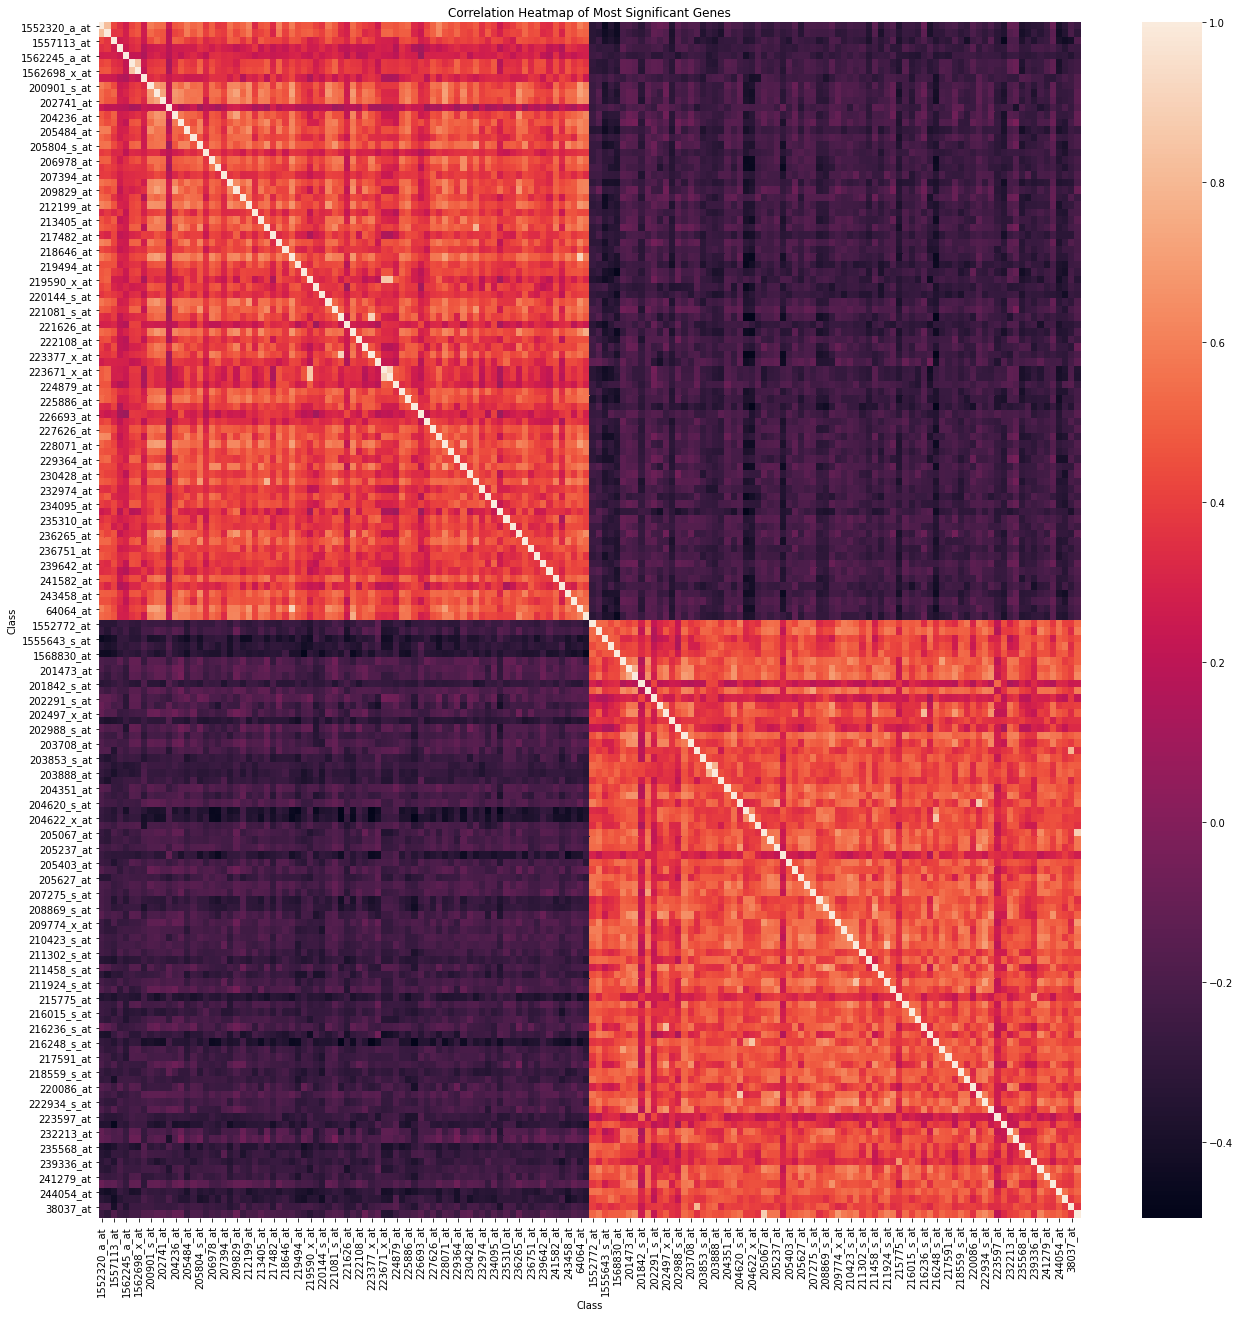

In [120]:
fig, axes = plt.subplots(1,1, figsize=(22,22))
sns.heatmap(kendall_correlation_matrix)
plt.title("Correlation Heatmap of Most Significant Genes")

D2.

For pairwise independent samples we expect Kendall correlation to be 0.

In [121]:
print(kendall_correlation_matrix.unstack().mean())

0.09016181231892699


D.3 

When considering a pair of overexpressed genes (or both underexpressed gened) we observer they have high correlation. 
When comparing an over expressed gene with an underexpressed one, they mostly have negative correlation. 
This means that pairs of overexpressed (or of underexpressed) genes are co-expressed.

D4

In [123]:
p_values = []
for i in range(total_expressed.shape[1]):
  for j in range(i+1, total_expressed.shape[1]):
    tau, p_v = stats.kendalltau(total_expressed.iloc[:,i],total_expressed.iloc[:,j]) 
    p_values.append(p_v)

p_values = np.array(p_values)
p_values = np.sort(p_values)
n= len(p_values)

print(n)

12720


In [124]:
gene_qty = 0
for i in range(1,n):
  fdr = np.round((p_values[i]*n) / i , 3)
  if fdr == 0.050:
    #print(i, fdr, p_values[i])
    gene_qty = i
print('Gene qty with FDR 0.05:', gene_qty)

Gene qty with FDR 0.05: 12359


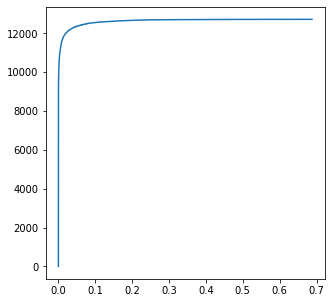

In [125]:
y = np.arange(1, n+1)
fig, axes = plt.subplots(1,1, figsize=(5,5))
axes.plot(p_values, y)

3 D. 5) 
For more samples we will have more false discoveries because there is a higher probability that samples with significant p-values occur spuriously/ by chance.
Adding more samples adds complexity to the calculations.
By taking only samples from D we may be ignoring other genes that have different correlation values and are not as extremely underexpressed or overexpressed.


(160, 160)


Text(0.5, 1.0, 'Correlation Heatmap of Most Significant Genes for sick patients')

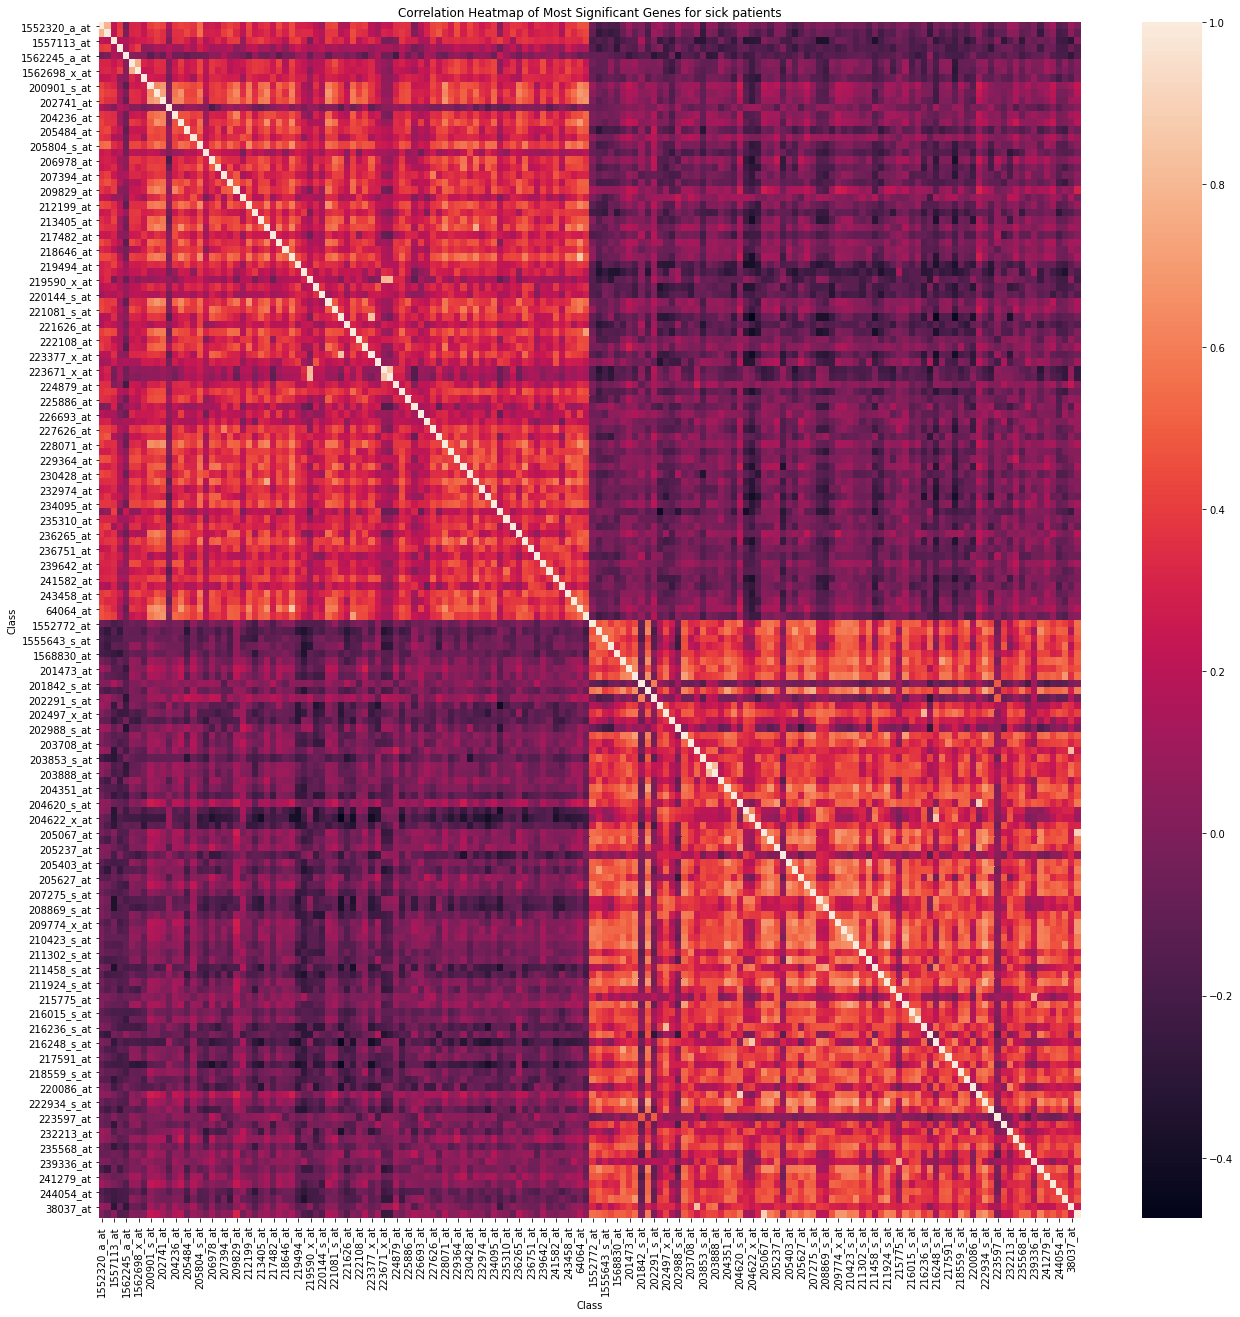

In [126]:
#Part D.6
M_df = total_expressed[50:].copy()
M_kendall_correlation_matrix = M_df.corr(method='kendall')
print(M_kendall_correlation_matrix.shape)
M_fig, M_axes = plt.subplots(1,1, figsize=(22,22))
sns.heatmap(M_kendall_correlation_matrix)
plt.title("Correlation Heatmap of Most Significant Genes for sick patients")

By removing H samples (and keeping only "sick" patients), we observe a weaker correlation as we are chossing genes with high differential expression. This is observed clearly on the brightness or strongness of the colours in the heatmap compared to the one before.

In [127]:
print(M_kendall_correlation_matrix.unstack().mean())

#Repeat D.4 for M
p_values = []
for i in range(M_df.shape[1]):
  for j in range(i+1, M_df.shape[1]):
    tau, p_v = stats.kendalltau(M_df.iloc[:,i],M_df.iloc[:,j]) 
    p_values.append(p_v)

p_values = np.array(p_values)
wrs2 = p_values.copy()
p_values = np.sort(p_values)
n= len(p_values)

print(n)

0.14147669083724324
12720


In [128]:
gene_qty = 0
for i in range(1,n):
  fdr = np.round((p_values[i]*n) / i , 3)
  if fdr == 0.050:
    #print(i, fdr, p_values[i])
    gene_qty = i
print('Gene qty with FDR 0.05:', gene_qty)

Gene qty with FDR 0.05: 4975


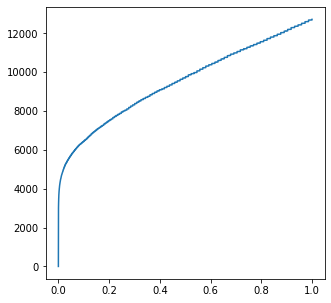

In [129]:
y = np.arange(1, n+1)
fig, axes = plt.subplots(1,1, figsize=(5,5))
axes.plot(p_values, y)

###PART E)

E.1

In [56]:
#We will use the values calculated in part C that are saved in df2

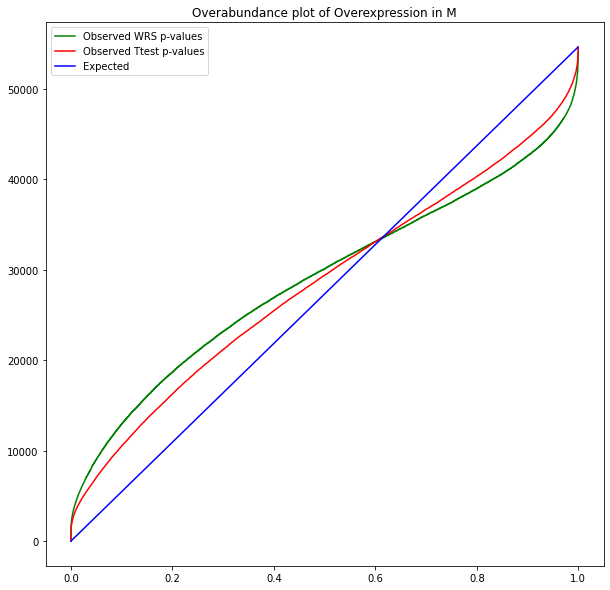

In [130]:
ttest = np.sort(np.array(df2['ttest_p_value']))
wrs = np.sort(np.array(df2['wrs_p_value']))

m = len(wrs)
y = np.arange(1, m+1)
x = np.arange(0,1, 0.001)
fig, axes = plt.subplots(1,1, figsize=(10,10))
axes.plot(wrs, y, color = 'g', label = 'Observed WRS p-values')
axes.plot(ttest, y, color = 'r', label = 'Observed Ttest p-values')
axes.set_title('Overabundance plot of Overexpression in M')
axes.plot(x, x*m, color = 'b', label = 'Expected')
axes.legend()

In [131]:
qty_05 = 0
qty_01 = 0
qty_005 = 0

for i in range(1,m):
  fdr = np.round((wrs[i]*m) / i , 3)
  if fdr == 0.0500:
    #print(i, fdr, p_values[i])
    qty_05 = i
  if fdr == 0.0100:
    #print(i, fdr, p_values[i])
    qty_01 = i
  if fdr == 0.0050:
    #print(i, fdr, p_values[i])
    qty_005 = i

print('Gene qty at FDR 0.05:', qty_05)
print('Gene qty at FDR 0.01:', qty_01)
print('Gene qty at FDR 0.005:', qty_005)

Gene qty at FDR 0.05: 2807
Gene qty at FDR 0.01: 1617
Gene qty at FDR 0.005: 1353


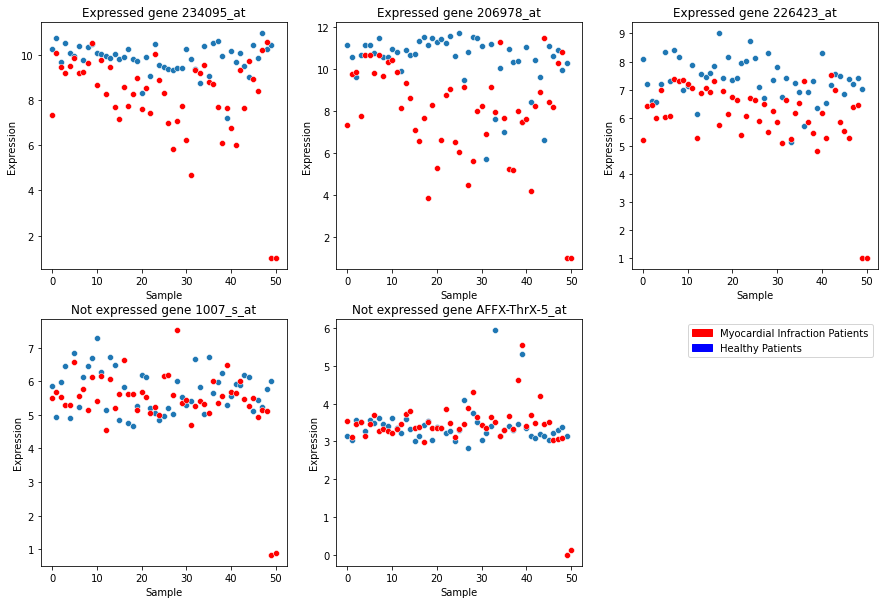

In [162]:
fig, axes = plt.subplots(2,3, figsize=(15,10))

gene_1_expressed_H = df2[df2['Class'] == '234095_at'].values[0][1:51]
gene_1_expressed_M = df2[df2['Class'] == '234095_at'].values[0][51:]
sns.scatterplot(data=gene_1_expressed_H, ax=axes[0,0]).set_title("Expressed gene 234095_at")
ax = sns.scatterplot(data=gene_1_expressed_M, color="r", ax=axes[0,0])
ax.set(xlabel="Sample", ylabel = "Expression")

gene_2_expressed_H = df2[df2['Class'] == '206978_at'].values[0][1:51]
gene_2_expressed_M = df2[df2['Class'] == '206978_at'].values[0][51:]
sns.scatterplot(data=gene_2_expressed_H, ax=axes[0,1]).set_title("Expressed gene 206978_at")
ax = sns.scatterplot(data=gene_2_expressed_M, color="r", ax=axes[0,1])
ax.set(xlabel="Sample", ylabel = "Expression")

gene_3_expressed_H = df2[df2['Class'] == '226423_at'].values[0][1:51]
gene_3_expressed_M = df2[df2['Class'] == '226423_at'].values[0][51:]
sns.scatterplot(data=gene_3_expressed_H, ax=axes[0,2]).set_title("Expressed gene 226423_at")
ax = sns.scatterplot(data=gene_3_expressed_M, color="r", ax=axes[0,2])
ax.set(xlabel="Sample", ylabel = "Expression")

## Not expressed for comparison
gene_1_not_expressed_H = df2[df2['Class'] == '1007_s_at'].values[0][1:51]
gene_1_not_expressed_M = df2[df2['Class'] == '1007_s_at'].values[0][51:]
sns.scatterplot(data=gene_1_not_expressed_H, ax=axes[1,0]).set_title("Not expressed gene 1007_s_at")
ax = sns.scatterplot(data=gene_1_not_expressed_M, color="r", ax=axes[1,0])
ax.set(xlabel="Sample", ylabel = "Expression")

gene_2_not_expressed_H = df2[df2['Class'] == 'AFFX-ThrX-5_at'].values[0][1:51]
gene_2_not_expressed_M = df2[df2['Class'] == 'AFFX-ThrX-5_at'].values[0][51:]
sns.scatterplot(data=gene_2_not_expressed_H, ax=axes[1,1]).set_title("Not expressed gene AFFX-ThrX-5_at")
ax = sns.scatterplot(data=gene_2_not_expressed_M, color="r", ax=axes[1,1])
ax.set(xlabel="Sample", ylabel = "Expression")

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Myocardial Infraction Patients')
blue_patch = mpatches.Patch(color='blue', label='Healthy Patients')
axes[1,2].set_frame_on(False)
axes[1,2].axes.get_yaxis().set_visible(False)
axes[1,2].axes.get_xaxis().set_visible(False)
axes[1,2].legend(handles=[red_patch, blue_patch])


In [133]:
#Heatmap of 160 genes
total_expressed.head()

Class,1552320_a_at,1552321_a_at,1557113_at,1560147_at,1562245_a_at,1562697_at,1562698_x_at,1565882_at,200901_s_at,201998_at,...,235568_at,239085_at,239336_at,240103_at,241279_at,243395_at,244054_at,244840_x_at,38037_at,39402_at
H,9.631248,9.758715,9.586664,7.178573,6.390290,9.149292,8.983085,6.969992,11.301184,11.160594,...,6.122200,5.556873,3.798355,7.770745,6.667995,10.663869,6.711893,7.576326,6.366306,9.958328
H.1,9.735947,9.553356,9.766501,7.533859,7.160803,8.832566,8.779940,7.494097,11.577843,11.221409,...,7.005672,5.353909,3.998479,5.389721,6.362268,9.233362,7.239616,6.476170,5.202912,8.099267
H.10,9.710447,9.768681,9.298883,7.090683,6.599785,9.833445,9.631361,5.460537,11.017823,10.781502,...,5.752862,4.028027,4.619297,4.796638,6.742417,10.969926,6.502218,5.341217,6.735996,6.566708
H.11,9.668546,9.740141,9.377304,6.630734,6.868730,9.874679,9.743666,5.544086,10.957565,10.688562,...,5.830031,4.014171,4.566414,5.832403,6.511612,10.861667,5.493340,5.955922,5.350409,6.787784
H.12,9.915049,10.068632,9.306213,7.207786,6.180120,9.457772,9.285518,7.377827,11.240372,11.240974,...,5.557801,4.970098,3.749581,7.758948,6.547938,10.219979,7.262167,6.389197,5.404348,9.678870


Text(0.5, 1.0, 'Correlation Heatmap of Most Significant Genes for all patients/samples')

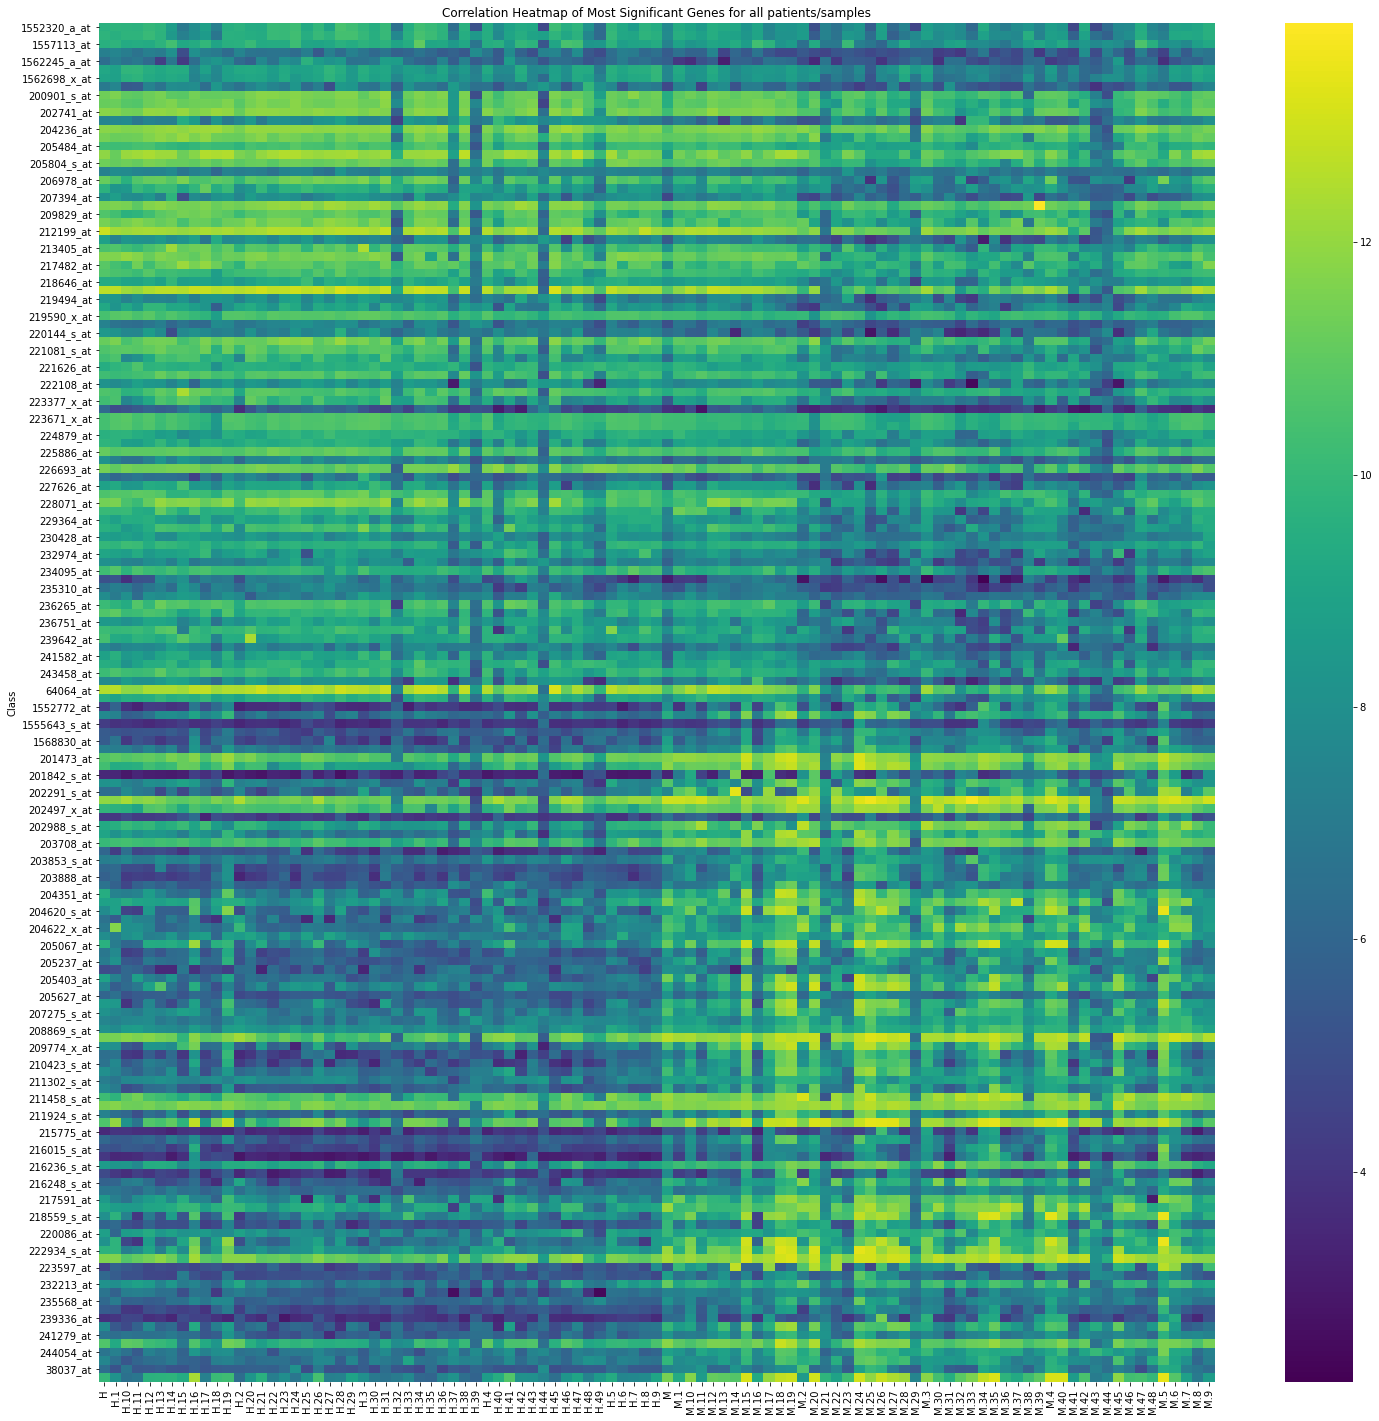

In [136]:
#One gene per row
fig, axes = plt.subplots(1,1, figsize=(25,25))
sns.heatmap(total_expressed.T,cmap = 'viridis')
plt.title("Correlation Heatmap of Most Significant Genes for all patients/samples")
#first columns are healthy, last columns are samples from sick patients